In [ ]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from textblob import TextBlob
from wordcloud import WordCloud
import re


In [2]:
log=pd.read_csv("twitter_keys.CSV")

In [3]:
consumerKey=log["key"][0]
consumerSecret=log["key"][1]
accessToken=log["key"][2]
accessTokenSecret=log["key"][3]

In [4]:
authenticate=tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api= tweepy.API(authenticate, wait_on_rate_limit=True)

In [5]:
print("Enter the name: example BillGates")
name = input()

Enter the name:
BillGates


In [6]:
posts=api.user_timeline(screen_name=name, count=100, lang="en",tweet_mode="extended")

In [7]:
for tweet in posts[0:5]:
  print(tweet.full_text+ "\n")

RT @CEPIvaccines: A safe and effective #COVID19 vaccine is the way out of this devastating pandemic🌍

Our Director of Vaccine R&amp;D, Melanie…

Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: https://t.co/2NqFWLr30o

RT @trevormundel: This commitment is critical. “Additional manufacturing capacity to begin producing doses for every country, not just the…

Teaching special education takes an amazing person to figure out exactly what works for each child. Talking with Washington State Teacher of the Year Amy Campbell gave me an even greater appreciation for these educators: https://t.co/YIxI1eoMkG https://t.co/kOY0tciVAp

RT @antonioguterres: Last month, over 1 billion students were affected by #COVID19 school closures.

Even before the pandemic, the world wa…



In [8]:
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['tweets'])
df

,tweets
0,RT @CEPIvaccines: A safe and effective #COVID1...
1,Because of long-standing barriers that are mad...
2,RT @trevormundel: This commitment is critical....
3,Teaching special education takes an amazing pe...
4,"RT @antonioguterres: Last month, over 1 billio..."
...,...
95,Melinda and I have met many stunted children i...
96,Climate change is one of the toughest challeng...
97,When Warren Buffett donated the bulk of his fo...
98,Diseases that cause dementia are only diagnose...


In [13]:
text_messages = df['tweets']
text_messages

0     RT @CEPIvaccines: A safe and effective #COVID1...
1     Because of long-standing barriers that are mad...
2     RT @trevormundel: This commitment is critical....
3     Teaching special education takes an amazing pe...
4     RT @antonioguterres: Last month, over 1 billio...
                            ...                        
95    Melinda and I have met many stunted children i...
96    Climate change is one of the toughest challeng...
97    When Warren Buffett donated the bulk of his fo...
98    Diseases that cause dementia are only diagnose...
99    We’re hopeful that our foundation’s work with ...
Name: tweets, Length: 100, dtype: object

In [36]:
from nltk.stem import WordNetLemmatizer 
import string
import nltk
from nltk.corpus import stopwords
  
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = "".join(char for char in text if char not in string.punctuation)
    tokens = re.split('\W+', text)
    text = [word for word in tokens if not word in stopwords.words('english')]
    final_text = [lemmatizer.lemmatize(word) for word in text]
    return final_text

In [52]:
all_words = clean_text(df['tweets'])


In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [54]:
positive = [word for word in all_words if (sid.polarity_scores(word)['pos']>= 0.5)]
negitive = [word for word in all_words if (sid.polarity_scores(word)['neg']> 0.5)]

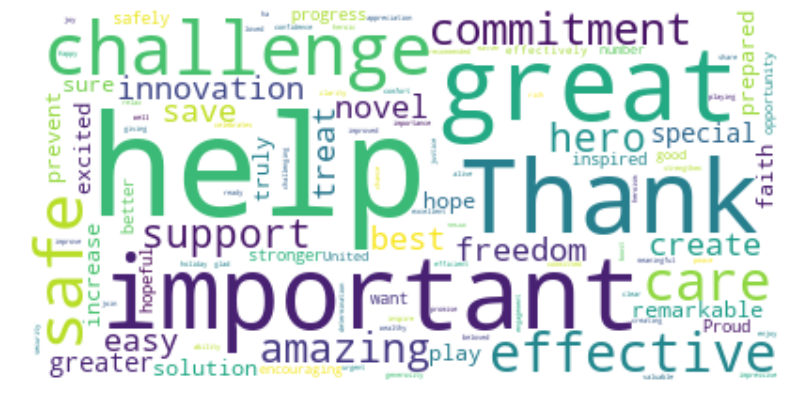

In [55]:
wordcloud = WordCloud(max_font_size=75, max_words = 100, background_color='white').generate(" ".join(positive))
plt.figure(figsize=(12, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

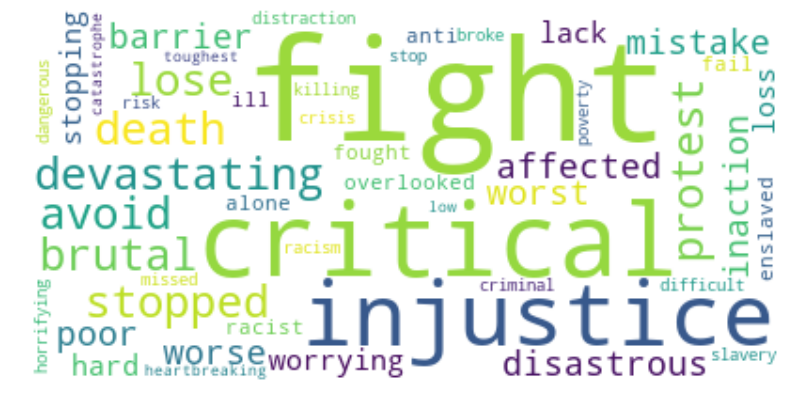

In [56]:
wordcloud = WordCloud(max_font_size=75, max_words = 100, background_color='white').generate(" ".join(negitive))
plt.figure(figsize=(12, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
import nltk
import numpy as np
import random
import string # to process standard python strings
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
from chatterbot import ChatBot

In [61]:
text_corpus = " ".join(df['tweets'])

In [62]:
sent_tokens = nltk.sent_tokenize(text_corpus)

In [ ]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)
        
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

flag=True
print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+greeting(user_response))
            else:
                print("ROBO: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("ROBO: Bye! take care..")